# Overarching tutorial for **DynamicalSystems.jl**

This page serves as a short but to-the-point introduction to the **DynamicalSystems.jl**
library. It outlines the core components, and how they establish an interface that
is used by the rest of the library. It also provides a couple of usage examples
to connect the various packages of the library together.

Going through this tutorial should take you about 20 minutes.

> **Also available as a Jupyter notebook**
>
> This tutorial is also available online as a [Jupyter notebook](https://github.com/JuliaDynamics/DynamicalSystems.jl/blob/gh-pages/dev/tutorial.ipynb).

## Installation

To install **DynamicalSystems.jl**, simply do:
```julia
using Pkg; Pkg.add("DynamicalSystems")
```

This installs several packages for the Julia language. These are the sub-modules/packages
that comprise **DynamicalSystems.jl**, see contents for more.
All of the functionality is brought into scope when doing:

In [1]:
using DynamicalSystems

in your Julia session.

### Package versions used

In [2]:
import Pkg

Activate an environment in the folder containing the notebook

In [3]:
Pkg.activate(dirname(@__DIR__))
Pkg.add(["DynamicalSystems", "CairoMakie", "OrdinaryDiffEq", "BenchmarkTools"])
Pkg.status(["DynamicalSystems", "CairoMakie", "OrdinaryDiffEq", "BenchmarkTools"]; mode = Pkg.PKGMODE_MANIFEST)

  Activating project at `~/work/DynamicalSystems.jl/DynamicalSystems.jl/docs`
   Resolving package versions...
   Installed DynamicalSystems ─ v3.6.1
    Updating `~/work/DynamicalSystems.jl/DynamicalSystems.jl/docs/Project.toml`
  [61744808] ~ DynamicalSystems v3.6.1 `~/work/DynamicalSystems.jl/DynamicalSystems.jl` ⇒ v3.6.1
    Updating `~/work/DynamicalSystems.jl/DynamicalSystems.jl/docs/Manifest.toml`
  [61744808] ~ DynamicalSystems v3.6.1 `~/work/DynamicalSystems.jl/DynamicalSystems.jl` ⇒ v3.6.1
Precompiling project...
   5595.6 ms  ✓ DynamicalSystems
  11101.2 ms  ✓ DynamicalSystems → DynamicalSystemsVisualizations
  2 dependencies successfully precompiled in 18 seconds. 613 already precompiled.
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions. Otherwise, loading dependents of these packages may trigger further precompilation to work with the unexpected versions.
Status `~/work/DynamicalSystems.jl/DynamicalSystems.j

## **DynamicalSystems.jl** summary

In [4]:
@doc DynamicalSystems

![DynamicalSystems.jl logo: The Double Pendulum](https://github.com/JuliaDynamics/JuliaDynamics/blob/master/videos/dynamicalsystems/juliadynamics_logo_anim_dark.gif?raw=true)

[![](https://img.shields.io/badge/docs-online-blue.svg)](https://juliadynamics.github.io/DynamicalSystemsDocs.jl/dynamicalsystems/dev/) [![DocBuild](https://github.com/juliadynamics/DynamicalSystems.jl/workflows/CI/badge.svg)](https://github.com/JuliaDynamics/DynamicalSystems.jl/actions) [![DOI](http://joss.theoj.org/papers/10.21105/joss.00598/status.svg)](https://doi.org/10.21105/joss.00598) [![Textbook](https://img.shields.io/badge/Textbook-10.1007%2F978--3--030--91032--7-purple)](https://link.springer.com/book/10.1007/978-3-030-91032-7) [![Package Downloads](https://img.shields.io/badge/dynamic/json?url=http%3A%2F%2Fjuliapkgstats.com%2Fapi%2Fv1%2Ftotal_downloads%2FDynamicalSystems&query=total_requests&label=Downloads)](http://juliapkgstats.com/pkg/DynamicalSystems)

**DynamicalSystems.jl** is an [award-winning](https://dsweb.siam.org/The-Magazine/Article/winners-of-the-dsweb-2018-software-contest) Julia-based general-purpose software library for the whole of nonlinear dynamics and nonlinear timeseries analysis.

To install **DynamicalSystems.jl**, run `import Pkg; Pkg.add("DynamicalSystems")` as a Julia language command. To learn how to use it and see its contents visit the documentation, which you can either find [online](https://juliadynamics.github.io/DynamicalSystems.jl/dev/) or build locally by running the `docs/make.jl` file.

**DynamicalSystems.jl** is part of [JuliaDynamics](https://juliadynamics.github.io/JuliaDynamics/), an organization dedicated to creating high quality scientific software.

## Highlights

Aspects of **DynamicalSystems.jl** that make it stand out among other codebases for nonlinear dynamics or nonlinear timeseries analysis are:

  * **Exceptional documentation**. All implemented algorithms provide a high-level scientific description of their functionality in their documentation string as well as references to scientific papers. The documentation features hundreds of tutorials and examples ranging from introductory to expert usage.
  * **Accessible source code**. One of the main priorities of the library is that the source code of (almost) all implementations is small, simple, easy to understand and modify. This increases confidence, reduces bugs, and allows users to become developers without unnecessary effort.
  * **Open source community project**. Built from the ground up entirely on GitHub, **DynamicalSystems.jl** is 100% open source and based on community contributions. Anyone can be a developer of the library. Everyone is welcomed.
  * **Extensive content**. It aims to cover the entire field of nonlinear dynamics and nonlinear timeseries analysis. It has functionality for complexity measures, delay embeddings, periodic orbits, nonlocal stability analysis, continuation, chaos, fractal dimensions, surrogate testing, recurrence quantification analysis, and much more. Furthermore, all algorithms are "general" and work for any dynamical system applicable. Missing functionality that falls under this wide category of content is welcomed to be part of the library!
  * **Well tested**. All implemented functionality is extensively tested. Each time any change in the code base is done, the extensive test suite is run and checked before merging the change in.
  * **Extendable**. New contributions can become part of the library and be accessed by all users in the next release. Most importantly, all parts of the library follow professional standards in software design and implement extendable interfaces so that it is easy to contribute new functionality.
  * **Active development**. It is a living, evolving project. Since its beginning in May 2017, **DynamicalSystems.jl** has had some activity every single month: new features, new packages, bugfixes. The developer team routinely answers users questions on official Julia language forums.
  * **Performant**. Written entirely in Julia, heavily optimized and parallelized, and taking advantage of some of the best packages within the language, **DynamicalSystems.jl** is *really fast*.

## Goals

The **DynamicalSystems.jl** library started as a vision with three main goals; These same goals now are the core pillars guiding development, and are largely the source of where the aforementioned unique highlights stem from.

### Goal 1: Accessible and reproducible nonlinear dynamics

The first goal of the library is to make this beautiful field **accessible and reproducible**.

**Accessible** means that if you read on some sorts of fancy algorithm online in a scientific article, you should be able to use it instantly. You shouldn't have to put in the work to code it yourself. The authors of the paper already did that. *So why should you do it again?!* To resolve this problem we developed, and continue to develop, a library that has an incredibly low threshold of entry: contributing to **DynamicalSystems.jl** and making your code available to all is truly *easier* than coding your own algorithms from scratch, due to the well thought out and generic interfaces it provides for dynamical systems.

**Reproducible** means that given some sorts of dynamical systems analysis in a scientific article, you should be able to do *exactly the same analysis* and get *exactly the same results* (within some numeric precision) as the article. After all, computers are deterministic constructs. **DynamicalSystems.jl** allows this by (1) being written in a modern programming language with incredible environment and reproducibility support, (2) being well tested, and (3) by providing thousands of algorithms out of the box, allowing most dynamical systems analysis to be done instantly while implementing only as little new stuff as necessary.

### Goal 2: Library in the literal sense

**DynamicalSystems.jl** is not just a software library. It is also a library in the literal sense: *where people go to learn something new* (here in particular for nonlinear dynamics). That is why the documentation is of exceptionally high quality: detailed descriptions and explanations of algorithms, with references to the scientific articles articles. It is also partly a reason for the source code to be written as clearly as possible, so that it is examinable by any user.

### Goal 3: A general purpose software

The third goal is to fill the missing gap of a high quality *general purpose software* for nonlinear dynamics which can be easily extended with new functionality. This can be particularly impactful in teaching. You see, it is unfortunately rarely the case that real, *runnable* code is shown in the classroom, because it is often long and messy. This is especially hurtful for nonlinear dynamics, a field where computer-assisted exploration is critical.

**DynamicalSystems.jl** provides teachers with a framework capable of demonstrating actual, real-world nonlinear dynamics code and its output, without having to invest the weeks to code the internal infrastructure themselves. Its high level syntax requires writing little code to get lots of meaningful analysis done, while its extensive functionality covers most typical classroom applications.

### Goal 4: Stopping the endless re-invention of wheel

Because Nonlinear Dynamics as a field lacks a general purpose and "widely accepted" software, almost every software implementation starts from scratch. While doing so much of the code written actually implements functionality that already exists in some other codebase for nonlinear dynamics. This is astonishingly, and shamefully, prevalent in nonlinear dynamics, where up to 90% of the functionality of a codebase may already exist somewhere else. Needless to say this is just an absolute waste of time!

**DynamicalSystems.jl** hopes to establish itself as the central software for nonlinear dynamics, from which new algorithms can be implementing. Re-using all the well-thought out interfaces and functionality means that one does not have to waste time writing code for functionality that already exists. Rather, they can focus on coding only the *new* stuff!


## Core components

The individual packages that compose `DynamicalSystems` interact flawlessly with each other because of the following two components:

1. The `StateSpaceSet`, which represents numerical data. They can be observed or measured from experiments, sampled trajectories of dynamical systems, or just unordered sets in a state space. A `StateSpaceSet` is a container of equally-sized points, representing multivariate timeseries or multivariate datasets. Timeseries, which are univariate sets, are represented by the `AbstractVector{<:Real}` Julia base type.
2. The `DynamicalSystem`, which is the abstract representation of a dynamical system with a known dynamic evolution rule. `DynamicalSystem` defines an extendable interface, but typically one uses existing implementations such as `DeterministicIteratedMap` or `CoupledODEs`.

## Making dynamical systems

In the majority of cases, to make a dynamical system one needs three things:

1. The dynamic rule `f`: A Julia function that provides the instructions of how to evolve the dynamical system in time.
2. The state `u`: An array-like container that contains the variables of the dynamical system and also defines the starting state of the system.
3. The parameters `p`: An arbitrary container that parameterizes `f`.

For most concrete implementations of `DynamicalSystem` there are two ways of defining `f, u`.
The distinction is done on whether `f` is defined as an in-place (iip) function or out-of-place (oop) function.

* **oop** : `f` **must** be in the form `f(u, p, t) -> out`
    which means that given a state `u::SVector{<:Real}` and some parameter container
    `p` it returns the output of `f` as an `SVector{<:Real}` (static vector).
* **iip** : `f` **must** be in the form `f!(out, u, p, t)`
    which means that given a state `u::AbstractArray{<:Real}` and some parameter container `p`,
    it writes in-place the output of `f` in `out::AbstractArray{<:Real}`.
    The function **must** return `nothing` as a final statement.

`t` stands for current time in both cases.
**iip** is suggested for systems with high dimension and **oop** for small.
The break-even point is between 10 to 100 dimensions but should be benchmarked
on a case-by-case basis as it depends on the complexity of `f`.

> **Autonomous vs non-autonomous systems**
>
> Whether the dynamical system is autonomous (`f` doesn't depend on time) or not, it is still necessary to include `t` as an argument to `f`. Some algorithms utilize this information, some do not, but we prefer to keep a consistent interface either way.

> **Dynamical systems are modified!**
>
> It is not immediatelly obvious, but all library functions that obtain as an input a
> `DynamicalSystem` instance will modify it, in-place. For example the `current_state`
> of the system before and after giving it to a function such as `basins_of_attraction`
> will not be the same! This also affects parallelization, see below.

### Example: Henon map

Let's make the Henon map, defined as
$$
\begin{aligned}
x_{n+1} &= 1 - ax^2_n+y_n \\
y_{n+1} & = bx_n
\end{aligned}
$$
with parameters $a = 1.4, b = 0.3$.

First, we define the dynamic rule as a standard Julia function. Since the dynamical system is only two-dimensional, we should use the _out-of-place_ form that returns an `SVector` with the next state:

In [5]:
using DynamicalSystems

function henon_rule(u, p, n) # here `n` is "time", but we don't use it.
    x, y = u # system state
    a, b = p # system parameters
    xn = 1.0 - a*x^2 + y
    yn = b*x
    return SVector(xn, yn)
end

henon_rule (generic function with 1 method)

Then, we define initial state and parameters

In [6]:
u0 = [0.2, 0.3]
p0 = [1.4, 0.3]

2-element Vector{Float64}:
 1.4
 0.3

Lastly, we give these three to the `DeterministicIteratedMap`:

In [7]:
henon = DeterministicIteratedMap(henon_rule, u0, p0)

2-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  henon_rule
 parameters:    [1.4, 0.3]
 time:          0
 state:         [0.2, 0.3]


`henon` is a `DynamicalSystem`, one of the two core structures of the library.
They can evolved interactively, and queried, using the interface defined by `DynamicalSystem`.
The simplest thing you can do with a `DynamicalSystem` is to get its trajectory:

In [8]:
total_time = 10_000
X, t = trajectory(henon, total_time)
X

2-dimensional StateSpaceSet{Float64} with 10001 points
  0.2        0.3
  1.244      0.06
 -1.10655    0.3732
 -0.341035  -0.331965
  0.505208  -0.102311
  0.540361   0.151562
  0.742777   0.162108
  0.389703   0.222833
  1.01022    0.116911
 -0.311842   0.303065
  ⋮         
 -0.582534   0.328346
  0.853262  -0.17476
 -0.194038   0.255978
  1.20327   -0.0582113
 -1.08521    0.36098
 -0.287758  -0.325562
  0.558512  -0.0863275
  0.476963   0.167554
  0.849062   0.143089

`X` is a `StateSpaceSet`, the second of the core structures of the library.
We'll see below how, and where, to use a `StateSpaceset`, but for now let's just do a scatter plot

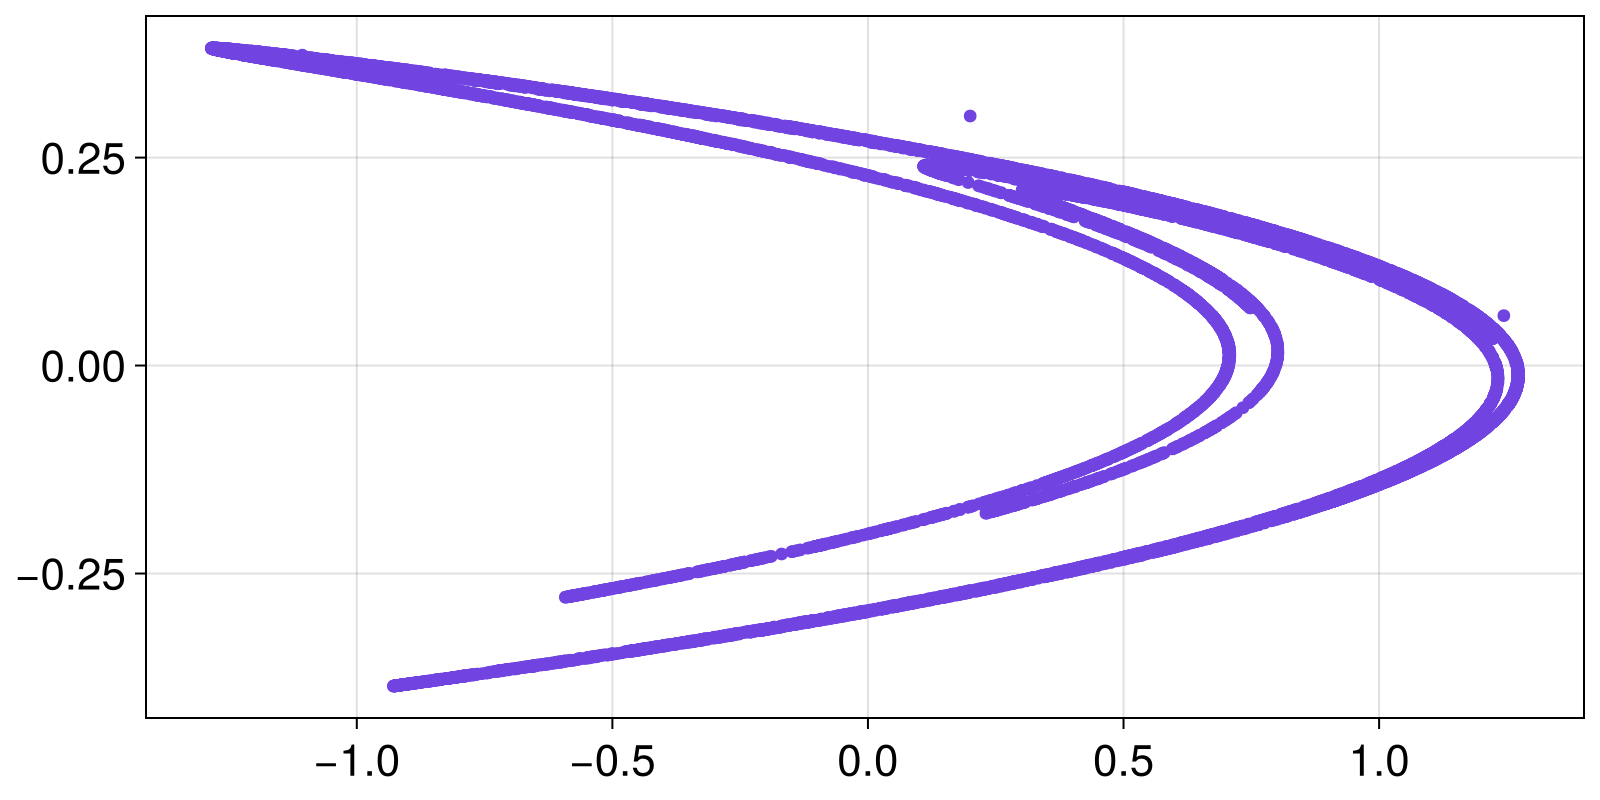

In [9]:
using CairoMakie
scatter(X)

### Example: Lorenz96

Let's also make another dynamical system, the Lorenz96 model:
$$
\frac{dx_i}{dt} = (x_{i+1}-x_{i-2})x_{i-1} - x_i + F
$$
for $i \in \{1, \ldots, N\}$ and $N+j=j$.

Here, instead of a discrete time map we have $N$ coupled ordinary differential equations. However, creating the dynamical system works out just like above, but using `CoupledODEs` instead of `DeterministicIteratedMap`.

First, we make the dynamic rule function. Since this dynamical system can be arbitrarily high-dimensional, we prefer to use the _in-place_ form for `f`, overwriting in place the rate of change in a pre-allocated container. It is [customary](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention) to append the name of functions that modify their arguments in-place with a bang (`!`).

In [10]:
function lorenz96_rule!(du, u, p, t)
    F = p[1]; N = length(u)
    # 3 edge cases
    du[1] = (u[2] - u[N - 1]) * u[N] - u[1] + F
    du[2] = (u[3] - u[N]) * u[1] - u[2] + F
    du[N] = (u[1] - u[N - 2]) * u[N - 1] - u[N] + F
    # then the general case
    for n in 3:(N - 1)
        du[n] = (u[n + 1] - u[n - 2]) * u[n - 1] - u[n] + F
    end
    return nothing # always `return nothing` for in-place form!
end

lorenz96_rule! (generic function with 1 method)

then, like before, we define an initial state and parameters, and initialize the system

In [11]:
N = 6
u0 = range(0.1, 1; length = N)
p0 = [8.0]
lorenz96 = CoupledODEs(lorenz96_rule!, u0, p0)

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  lorenz96_rule!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [8.0]
 time:          0.0
 state:         [0.1, 0.28, 0.46, 0.64, 0.82, 1.0]


and, again like before, we may obtain a trajectory the same way

In [12]:
total_time = 12.5
sampling_time = 0.02
Y, t = trajectory(lorenz96, total_time; Ttr = 2.2, Δt = sampling_time)
Y

6-dimensional StateSpaceSet{Float64} with 626 points
  3.15368   -4.40493  0.0311581  0.486735  1.89895   4.15167
  2.71382   -4.39303  0.395019   0.66327   2.0652    4.32045
  2.25088   -4.33682  0.693967   0.879701  2.2412    4.46619
  1.7707    -4.24045  0.924523   1.12771   2.42882   4.58259
  1.27983   -4.1073   1.08656    1.39809   2.62943   4.66318
  0.785433  -3.94005  1.18319    1.6815    2.84384   4.70147
  0.295361  -3.74095  1.2205     1.96908   3.07224   4.69114
 -0.181932  -3.51222  1.20719    2.25296   3.3139    4.62628
 -0.637491  -3.25665  1.154      2.5267    3.56698   4.50178
 -1.06206   -2.9781   1.07303    2.7856    3.82827   4.31366
  ⋮                                                  ⋮
  3.17245    2.3759   3.01796    7.27415   7.26007  -0.116002
  3.29671    2.71146  3.32758    7.5693    6.75971  -0.537853
  3.44096    3.09855  3.66908    7.82351   6.13876  -0.922775
  3.58387    3.53999  4.04452    8.01418   5.39898  -1.25074
  3.70359    4.03513  4.45448    8.

We can't scatterplot something 6-dimensional but we can visualize all timeseries

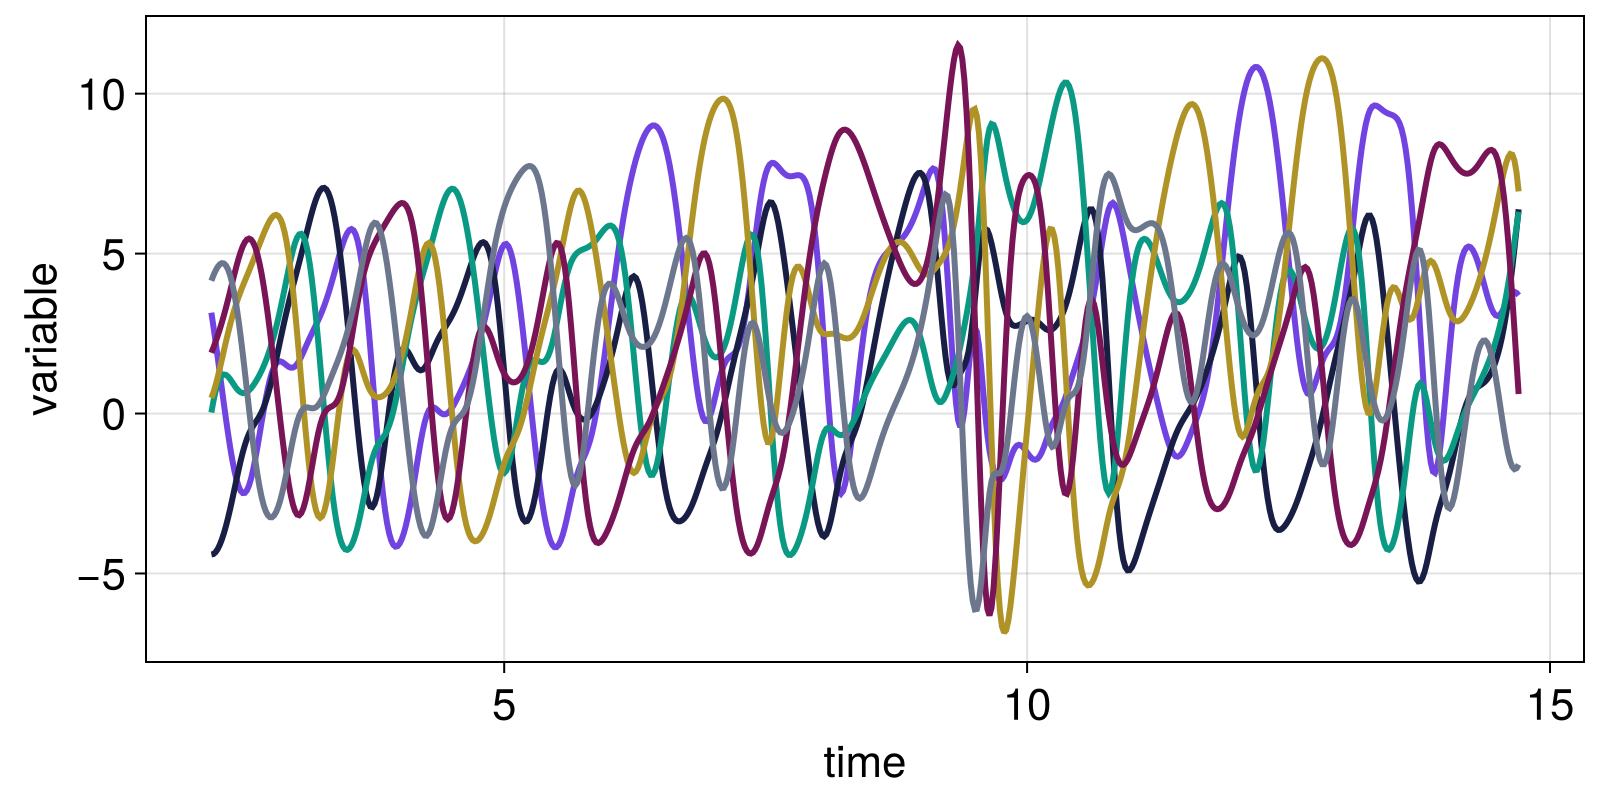

In [13]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel = "time", ylabel = "variable")
for var in columns(Y)
    lines!(ax, t, var)
end
fig

### ODE solving and choosing solver

Continuous time dynamical systems are evolved through DifferentialEquations.jl.
In this sense, the above `trajectory` function is a simplified version of `DifferentialEquations.solve`.
If you only care about evolving a dynamical system forwards in time, you are probably better off using
DifferentialEquations.jl directly. **DynamicalSystems.jl** can be used to do many other things that either occur during
the time evolution or after it, see the section below on using dynamical systems.

When initializing a `CoupledODEs` you can tune the solver properties to your heart's
content using any of the [ODE solvers](https://diffeq.sciml.ai/latest/solvers/ode_solve/)
and any of the [common solver options](https://diffeq.sciml.ai/latest/basics/common_solver_opts/).
For example:

In [14]:
using OrdinaryDiffEq: Vern9 # accessing the ODE solvers
diffeq = (alg = Vern9(), abstol = 1e-9, reltol = 1e-9)
lorenz96_vern = ContinuousDynamicalSystem(lorenz96_rule!, u0, p0; diffeq)

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  lorenz96_rule!
 ODE solver:    Vern9
 ODE kwargs:    (abstol = 1.0e-9, reltol = 1.0e-9)
 parameters:    [8.0]
 time:          0.0
 state:         [0.1, 0.28, 0.46, 0.64, 0.82, 1.0]


In [15]:
Y, t = trajectory(lorenz96_vern, total_time; Ttr = 2.2, Δt = sampling_time)
Y[end]

6-element SVector{6, Float64} with indices SOneTo(6):
  3.839024812256864
  6.155709531152434
  6.080625689022988
  7.278588308991119
  1.2582152212922841
 -1.52970629168123

The choice of the solver algorithm can have **huge impact on the performance and stability of the ODE integration!**
We will showcase this with two simple examples

#### Higher accuracy, higher order

The solver `Tsit5` (the default solver) is most performant when medium-low error
tolerances are requested. When we require very small error tolerances, choosing a different solver
can be more accurate. This can be especially impactful for chaotic dynamical systems.
Let's first expliclty ask for a given accuracy when solving the ODE by passing the
keywords `abstol, reltol` (for absolute and relative tolerance respectively),
and compare performance to a naive solver one would use:

In [16]:
using BenchmarkTools: @btime
using OrdinaryDiffEq: BS3 # 3rd order solver

for alg in (BS3(), Vern9())
    diffeq = (; alg, abstol = 1e-12, reltol = 1e-12)
    lorenz96 = CoupledODEs(lorenz96_rule!, u0, p0; diffeq)
    @btime step!($lorenz96, 100.0) # evolve for 100 time units
end

  634.961 ms (0 allocations: 0 bytes)
  2.613 ms (0 allocations: 0 bytes)


The performance difference is dramatic!

#### Stiff problems

A "stiff" ODE problem is one that can be numerically unstable unless the step size (or equivalently, the step error tolerances) are extremely small. There are several situations where a problem may be come "stiff":

- The derivative values can get very large for some state values.
- There is a large _timescale separation_ between the dynamics of the variables
- There is a large _speed separation_ between different state space regions

One must be aware whether this is possible for their system and choose a solver that is better suited to tackle stiff problems. If not, a solution may diverge and the ODE integrator will throw an error or a warning.

Many of the problems in DifferentialEquations.jl are suitable for dealing with stiff problems. We can create a stiff problem by using the well known Van der Pol  oscillator _with a timescale separation_:

$$
\begin{aligned}
\dot{x} & = y \\
\dot{y} /  \mu &= (1-x^2)y - x
\end{aligned}
$$

with $\mu$ being the timescale of the $y$ variable in units of the timescale of the $x$ variable. For very large values of $\mu$ this problem becomes stiff.

Let's compare

In [17]:
using OrdinaryDiffEq: Tsit5, Rodas5P

function vanderpol_rule(u, μ, t)
    x, y = u
    dx = y
    dy = μ*((1-x^2)*y - x)
    return SVector(dx, dy)
end

μ = 1e6

for alg in (Tsit5(), Rodas5P()) # default vs specialized solver
    diffeq = (; alg, abstol = 1e-12, reltol = 1e-12, maxiters = typemax(Int))
    vdp = CoupledODEs(vanderpol_rule, SVector(1.0, 1.0), μ; diffeq)
    @btime step!($vdp, 100.0)
end

  9.423 s (0 allocations: 0 bytes)
  21.604 s (610432650 allocations: 23.34 GiB)


We see that the stiff solver `Rodas5P` is much faster than the default `Tsit5` when there is a large timescale separation. This happened because `Rodas5P` required much less steps to integrated the same total amount of time. In fact, there are cases where regular solvers will _fail_ to integrate the ODE if the problem is very stiff, e.g. in the [ROBER example](https://docs.sciml.ai/SciMLBenchmarksOutput/stable/StiffODE/ROBER/).

So using an appropriate solver really does matter!
For more information on choosing solvers consult the DifferentialEquations.jl documentation.

## Interacting with dynamical systems

The `DynamicalSystem` type defines an extensive interface for what it means to be a
"dynamical system". This interface can be used to (1) define fundamentally new types
of dynamical systems, (2) to develop algorithms that utilize
dynamical systems with a known evolution rule. It can also be used to simply
query and alter properties of a given dynamical system. For example, we have

In [18]:
lorenz96

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  lorenz96_rule!
 ODE solver:    Vern9
 ODE kwargs:    (abstol = 1.0e-12, reltol = 1.0e-12)
 parameters:    [8.0]
 time:          373937.2591617173
 state:         [4.451316038377281, 4.51226119167876, 8.956481214735343, 0.7176270415006757, -5.997767807660769, 3.246476159108707]


which we can evolve forwards in time using `step!`

In [19]:
step!(lorenz96, 100.0) # progress for `100.0` units of time

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  lorenz96_rule!
 ODE solver:    Vern9
 ODE kwargs:    (abstol = 1.0e-12, reltol = 1.0e-12)
 parameters:    [8.0]
 time:          374037.2725920354
 state:         [2.3734003517779425, 4.37637868693434, 2.3496585783194344, 6.969724011416678, -3.220485704233672, -2.9931792619033155]


and we can then query what is the current state that the dynamical system was brought into

In [20]:
current_state(lorenz96)

6-element Vector{Float64}:
  2.3734003517779425
  4.37637868693434
  2.3496585783194344
  6.969724011416678
 -3.220485704233672
 -2.9931792619033155

we can also restart the system at a different state using `set_state!`

In [21]:
set_state!(lorenz96, rand(6))

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  lorenz96_rule!
 ODE solver:    Vern9
 ODE kwargs:    (abstol = 1.0e-12, reltol = 1.0e-12)
 parameters:    [8.0]
 time:          374037.2725920354
 state:         [0.44601943645320297, 0.061807189972608256, 0.5851760585457002, 0.3451219116906521, 0.8555239485759726, 0.009488300377269554]


or we can alter system parameters given the index of the parameter and the value to set it to

In [22]:
set_parameter!(lorenz96, 1, 9.6) # change first parameter of the parameter container
current_parameters(lorenz96)

1-element Vector{Float64}:
 9.6

For more functions that query or alter a dynamical system see its docstring: `DynamicalSystem`.

## Using dynamical systems

Now, as an end-user, you are most likely to be giving a `DynamicalSystem` instance to a library function.
For example, you may want to compute the Lyapunov spectrum of the Lorenz96 system from above,
which is a functionality offered by `ChaosTools`.
This is as easy as calling the `lyapunovspectrum` function with `lorenz96`

In [23]:
steps = 10_000
lyapunovspectrum(lorenz96, steps)

6-element Vector{Float64}:
  1.183705044347775
  0.000109961748510045
 -0.10496946256637842
 -0.8320042390130777
 -1.5897605086322597
 -4.657080795884476

As expected, there is at least one positive Lyapunov exponent, because the system is chaotic,
and at least one zero Lyapunov exponent, because the system is continuous time.

A fantastic feature of **DynamicalSystems.jl** is that all library functions work for any
applicable dynamical system. The exact same `lyapunovspectrum` function would also work
for the Henon map.

In [24]:
lyapunovspectrum(henon, steps)

2-element Vector{Float64}:
  0.4167659070649148
 -1.6207387113908505

Something else that uses a dynamical system is estimating the basins of attraction
of a multistable dynamical system.
The Henon map is "multistable" in the sense that some initial conditions diverge to
infinity, and some others converge to a chaotic attractor.
Computing these basins of attraction is simple with `Attractors`, and would work as follows:

In [25]:
# define a state space grid to compute the basins on:
xg = yg = range(-2, 2; length = 201)
# find attractors using recurrences in state space:
mapper = AttractorsViaRecurrences(henon, (xg, yg); sparse = false)
# compute the full basins of attraction:
basins, attractors = basins_of_attraction(mapper; show_progress = false)

([-1 -1 … -1 -1; -1 -1 … -1 -1; … ; -1 -1 … -1 -1; -1 -1 … -1 -1], Dict{Int64, StateSpaceSet{2, Float64, SVector{2, Float64}}}(1 => 2-dimensional StateSpaceSet{Float64} with 416 points))

Let's visualize the result

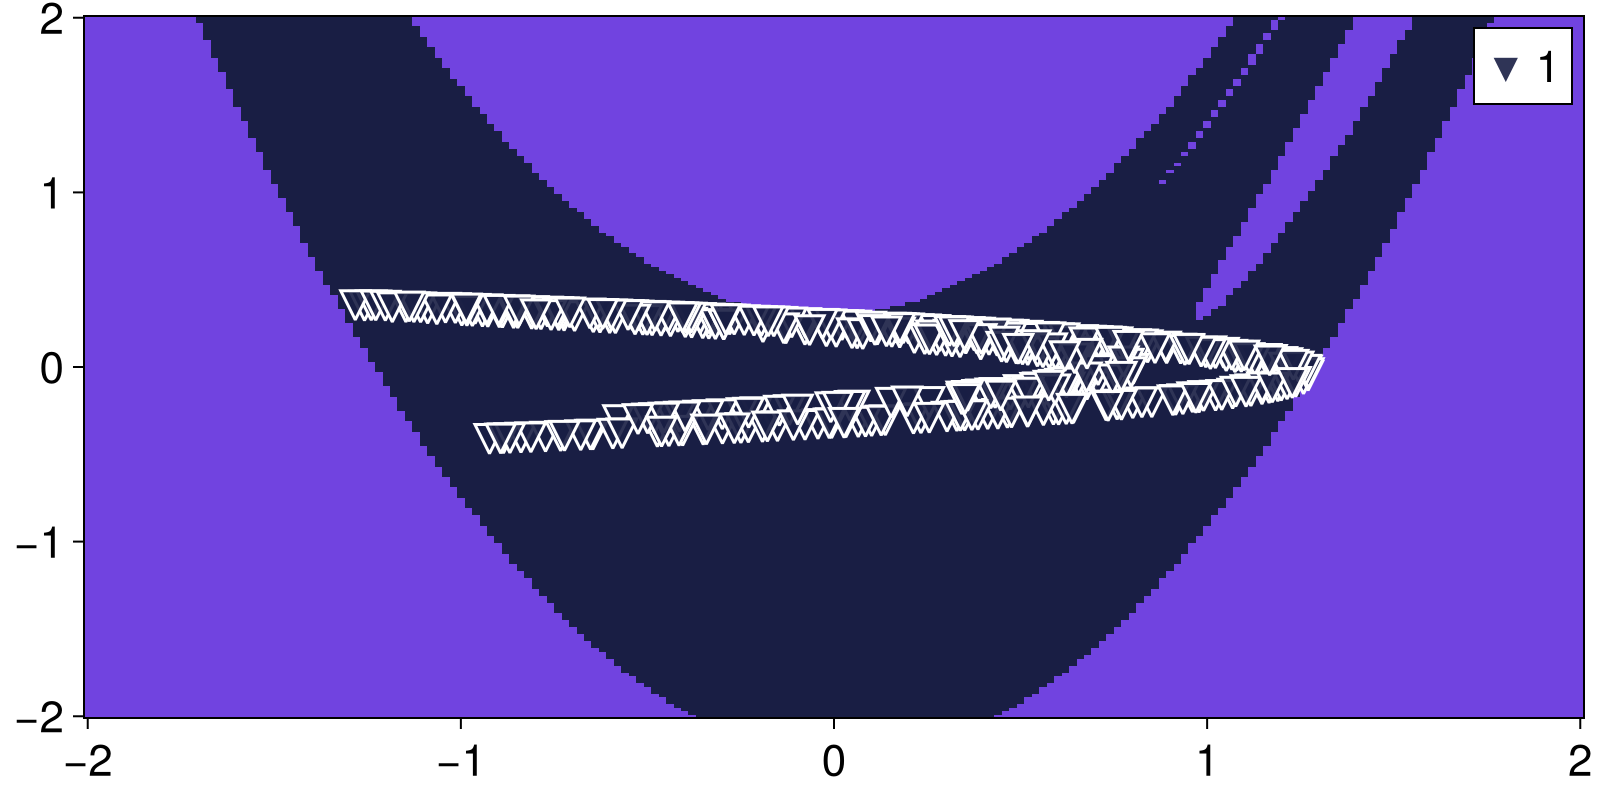

In [26]:
heatmap_basins_attractors((xg, yg), basins, attractors)

Another component of **DynamicalSystems.jl** that utilizes a `DynamicalSystem` instance
is `PeriodicOrbits`, which, you guessed it, finds periodic orbits.
In contrast to `Attractors`, `PeriodicOrbits` is dediced to finding both
stable and unstable periodic orbits. For example, it is known that inside
chaotic attractors there resides an infinity of periodic orbits.
Let's find many unstable periodic orbits, up to order 8, for the Henon map
using an algorithm dedicated to discrete time systems

In [27]:
xs = range(-3.0, 3.0; length = 10)
ys = range(-10.0, 10.0; length = 10)
seeds = [InitialGuess(SVector{2}(x,y), nothing) for x in xs for y in ys]
n = 7
alg = DavidchackLai(n=n, m=6, abstol=1e-7, disttol=1e-10)
output = periodic_orbits(henon, alg, seeds)
output = uniquepos(output)
output = minimal_period.(henon, output) # remove duplicates

17-element Vector{PeriodicOrbit{2, Float64, Int64, Missing}}:
 PeriodicOrbit{2, Float64, Int64, Missing}([0.975800051174896, -0.14274001535291814], 2, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([0.48533586255033284, 0.13257298540776663], 6, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([1.0380595354867264, 0.09343569464117174], 6, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([0.5158146929277369, 0.19052591242843564], 7, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([0.14145342273882552, -0.2778519831667656], 7, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([-1.0466775735267917, 0.3549679378175784], 7, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([0.8511588383495811, 0.14270331194999578], 7, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([-1.1313544770895048, -0.3394063431268514], 1, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([0.6313544770895047, 0.18940634312685142], 1, missing)
 PeriodicOrbit{2, Float64, Int64, Missing}([-0.335016

and now plot them on top of the chaotic attractor that we found
in the previous step

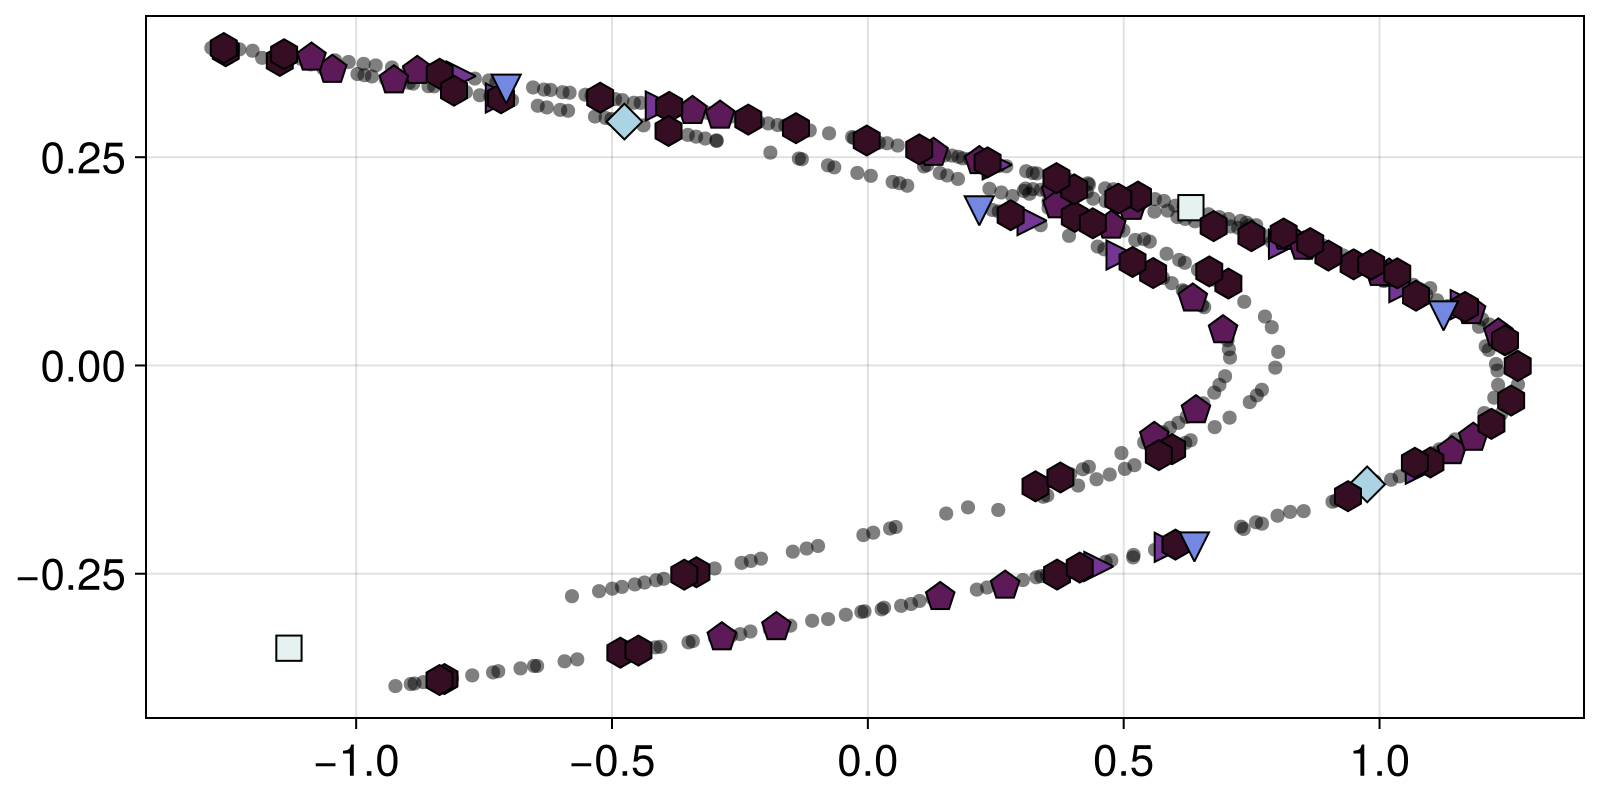

In [28]:
A = attractors[1]
fig, ax = scatter(A; color = ("black", 0.5), markersize = 10)
markers = [:rect, :diamond, :utriangle, :dtriangle, :ltriangle, :rtriangle, :pentagon, :hexagon]
cmap = cgrad(:dense, n+1; categorical = true)
for po in output
    scatter!(ax, po.points; markersize=20, color = cmap[po.T], marker=markers[po.T],
    strokewidth = 1, strokecolor = "black")
end
fig

## Stochastic systems

**DynamicalSystems.jl** has some support for stochastic systems
in the form of Stochastic Differential Equations (SDEs).
Just like `CoupledODEs`, one can make `CoupledSDEs`!
For example here is a stochastic version of a FitzHugh-Nagumo model

In [29]:
using StochasticDiffEq # load extention for `CoupledSDEs`

function fitzhugh_nagumo(u, p, t)
    x, y = u
    ϵ, β, α, γ, κ, I = p
    dx = (-α * x^3 + γ * x - κ * y + I) / ϵ
    dy = -β * y + x
    return SVector(dx, dy)
end
p = [1.,3.,1.,1.,1.,0.]
sde = CoupledSDEs(fitzhugh_nagumo, zeros(2), p; noise_strength = 0.05)

2-dimensional CoupledSDEs
 deterministic: false
 discrete time: false
 in-place:      false
 dynamic rule:  fitzhugh_nagumo
 SDE solver:    SOSRA
 SDE kwargs:    (abstol = 0.01, reltol = 0.01, dt = 0.1)
 Noise type:    (additive = true, autonomous = true, linear = true, invertible = true)
 parameters:    [1.0, 3.0, 1.0, 1.0, 1.0, 0.0]
 time:          0.0
 state:         [0.0, 0.0]


In this particular example the SDE noise is white noise (Wiener process)
with strength (σ) of 0.05. See the documentation of `CoupledSDEs` for alternatives.

In any case, in **DynamicalSystems.jl** all dynamical systems are part of the same
interace, stochastic or not. As long as the algorithm is not influenced by stochasticity,
we can apply it to `CoupledSDEs` just as well. For example, we can study multistability
in a stochastic system. In contrast to the previous example of the Henon map,
we have to use an alternative algorithm, because `AttractorsViaRecurrences`
only works for deterministic systems. So instead we'll use `AttractorsViaFeaturizing`:

In [30]:
featurizer(X, t) = X[end]

mapper = AttractorsViaFeaturizing(sde, featurizer; Ttr = 200, T = 10)

xg = yg = range(-1, 1; length = 101)

sampler, _ = statespace_sampler((xg, yg))

fs = basins_fractions(mapper, sampler; show_progress = false)

Dict{Int64, Float64} with 2 entries:
  2 => 0.514
  1 => 0.486

and we can see the stored "attractors"

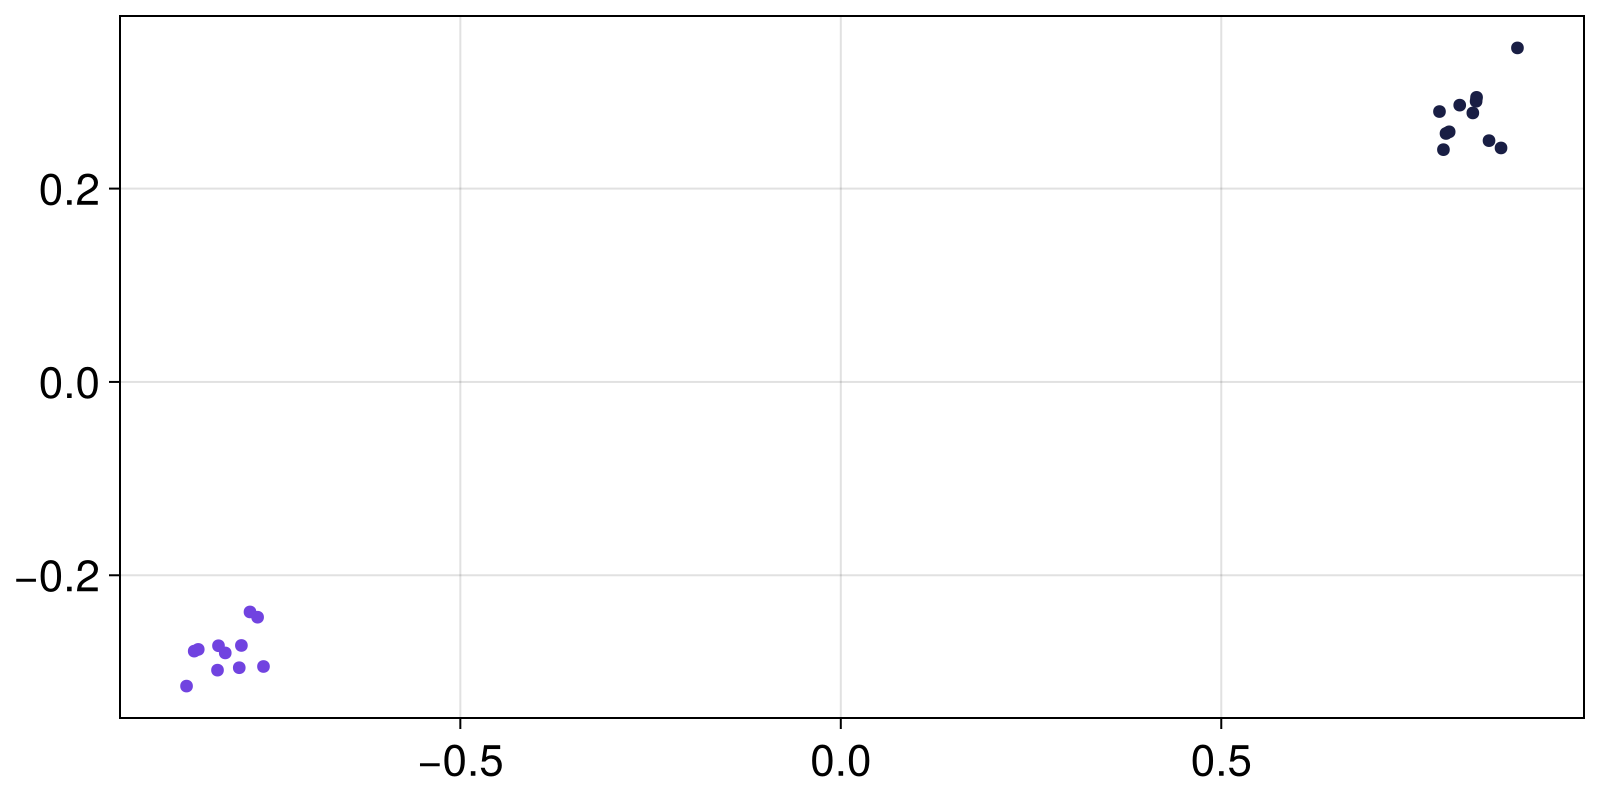

In [31]:
attractors = extract_attractors(mapper)
fig, ax = scatter(attractors[1])
scatter!(attractors[2])
fig

The mathematical concept of attractors
doesn't translate trivially to stochastic systems but thankfully
this system has two fixed point attractors that are only mildly perturbed
by the noise.

## Parallelization

Because `DynamicalSystem`s are mutable and most library functions mutate them,
one needs to be slightly delicate with parallelization.
The package OhMyThreads.jl can take care of all the details for us, like so:

```julia
ds = DynamicalSystem(f, u, p) # some concrete implementation
parameters = 0:0.01:1
outputs = zeros(length(parameters))

using OhMyThreads: @tasks, @local
@tasks for i in eachindex(parameters)
    @local system = deepcopy(ds) # important!
    set_parameter!(system, 1, parameters[i])
    outputs[i] = expesive_function(system, args...)
end
```

Note that parallelization is only useful if the expensive function is
significantly more expensive than copying the system and thread communication!

## Interactive GUIs

A particularly useful feature are interactive GUI apps one
can launch to examine a `DynamicalSystem`. The simplest is `interactive_trajectory_timeseries`.
To actually make it interactive one needs to enable GLMakie.jl as a backend:

```julia
import GLMakie
GLMakie.activate!()
```

and then launch the app:

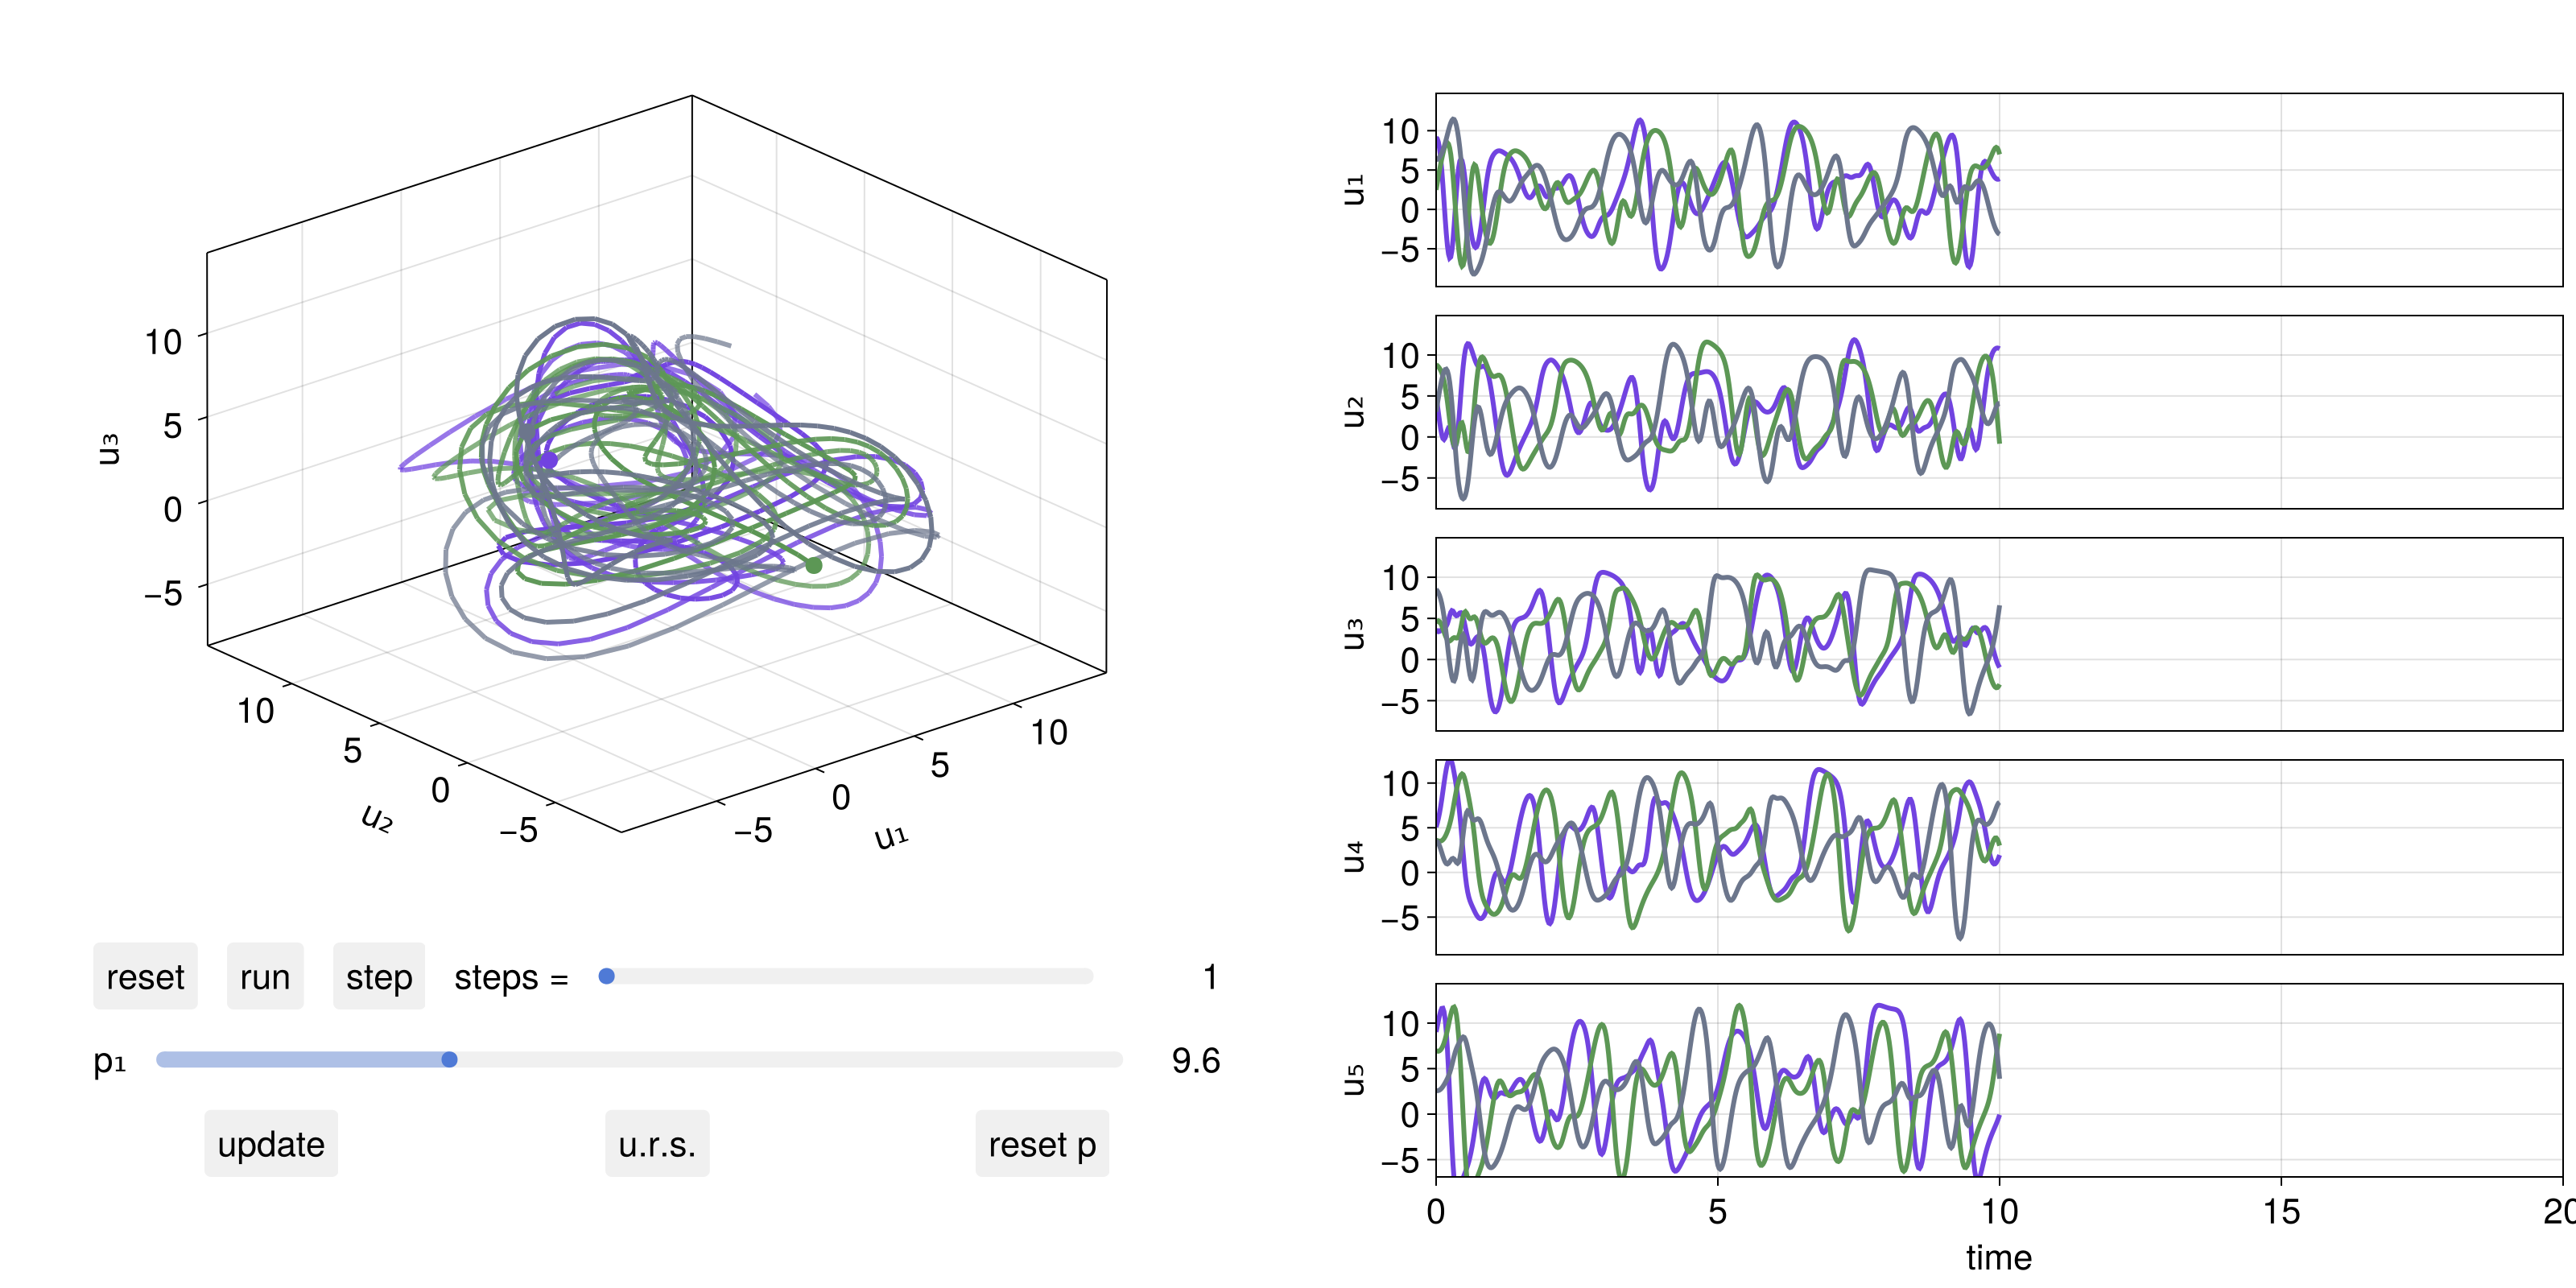

In [32]:
u0s = [10rand(5) for _ in 1:3]
parameter_sliders = Dict(1 => 0:0.01:32)

fig, dsobs = interactive_trajectory_timeseries(
    lorenz96, [1, 2, 3, 4, 5], u0s;
    Δt = 0.02, parameter_sliders
)
step!(dsobs, 500) # hide
fig

### Developing new algorithms

You could also be using a `DynamicalSystem` instance directly to build your own algorithm if it isn't already implemented (and then later contribute it so it _is_ implemented ;) ). A dynamical system can be evolved forwards in time using `step!`:

In [33]:
henon

2-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  henon_rule
 parameters:    [1.4, 0.3]
 time:          4
 state:         [0.8645652364614893, 0.1468830114550427]


Notice how the time is not 0, because `henon` has already been stepped when we called the function `basins_of_attraction` with it. We can step it more:

In [34]:
step!(henon)

2-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  henon_rule
 parameters:    [1.4, 0.3]
 time:          5
 state:         [0.10042074411824756, 0.25936957093844676]


In [35]:
step!(henon, 2)

2-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  henon_rule
 parameters:    [1.4, 0.3]
 time:          7
 state:         [-1.1407856457447472, 0.37357545442484374]


For more information on how to directly use `DynamicalSystem` instances,
see the interface of `DynamicalSystem`.

## State space sets

Let's recall that the output of the `trajectory` function is a `StateSpaceSet`:

In [36]:
X

2-dimensional StateSpaceSet{Float64} with 10001 points
  0.2        0.3
  1.244      0.06
 -1.10655    0.3732
 -0.341035  -0.331965
  0.505208  -0.102311
  0.540361   0.151562
  0.742777   0.162108
  0.389703   0.222833
  1.01022    0.116911
 -0.311842   0.303065
  ⋮         
 -0.582534   0.328346
  0.853262  -0.17476
 -0.194038   0.255978
  1.20327   -0.0582113
 -1.08521    0.36098
 -0.287758  -0.325562
  0.558512  -0.0863275
  0.476963   0.167554
  0.849062   0.143089

This is the main data structure used in **DynamicalSystems.jl** to handle numerical data.
It is printed like a matrix where each column is the timeseries of each dynamic variable.
In reality, it is a vector equally-sized vectors representing state space points.
_(For advanced users: `StateSpaceSet` directly subtypes `AbstractVector{<:AbstractVector}`)_

When indexed with 1 index, it behaves like a vector of vectors

In [37]:
X[1]

2-element SVector{2, Float64} with indices SOneTo(2):
 0.2
 0.3

In [38]:
X[2:5]

2-dimensional StateSpaceSet{Float64} with 4 points
  1.244      0.06
 -1.10655    0.3732
 -0.341035  -0.331965
  0.505208  -0.102311

When indexed with two indices, it behaves like a matrix

In [39]:
X[7:13, 2] # 2nd column

7-element Vector{Float64}:
  0.1621081681101694
  0.22283309461548204
  0.11691103950545975
  0.30306503631282444
 -0.09355263057973214
  0.35007640234803744
 -0.29998206408499634

When iterated, it iterates over the contained points

In [40]:
for (i, point) in enumerate(X)
    @show point
    i > 5 && break
end

point = [0.2, 0.3]
point = [1.244, 0.06]
point = [-1.1065503999999997, 0.3732]
point = [-0.34103530283622296, -0.3319651199999999]
point = [0.5052077711071681, -0.10231059085086688]
point = [0.5403605603672313, 0.1515623313321504]


In [41]:
map(point -> point[1] + 1/(point[2]+0.1), X)

10001-element Vector{Float64}:
    2.7
    7.494
    1.006720944040575
   -4.652028265916192
 -432.28452634595817
    4.515518505137784
    4.557995741581754
    3.4872793228808314
    5.620401692451571
    2.1691470931310732
    ⋮
    1.752024323892008
  -12.522817477226136
    2.6151207744662046
   25.133206775921803
    1.0840850677362275
   -4.721137673509619
   73.69787164232238
    4.214533120554577
    4.9627832739756785

The columns of the set are obtained with the convenience `columns` function

In [42]:
x, y = columns(X)
summary.((x, y))

("10001-element Vector{Float64}", "10001-element Vector{Float64}")

Because `StateSpaceSet` really is a vector of vectors, it can be given
to any Julia function that accepts such an input. For example,
the Makie plotting ecosystem knows how to plot vectors of vectors.
That's why this works:

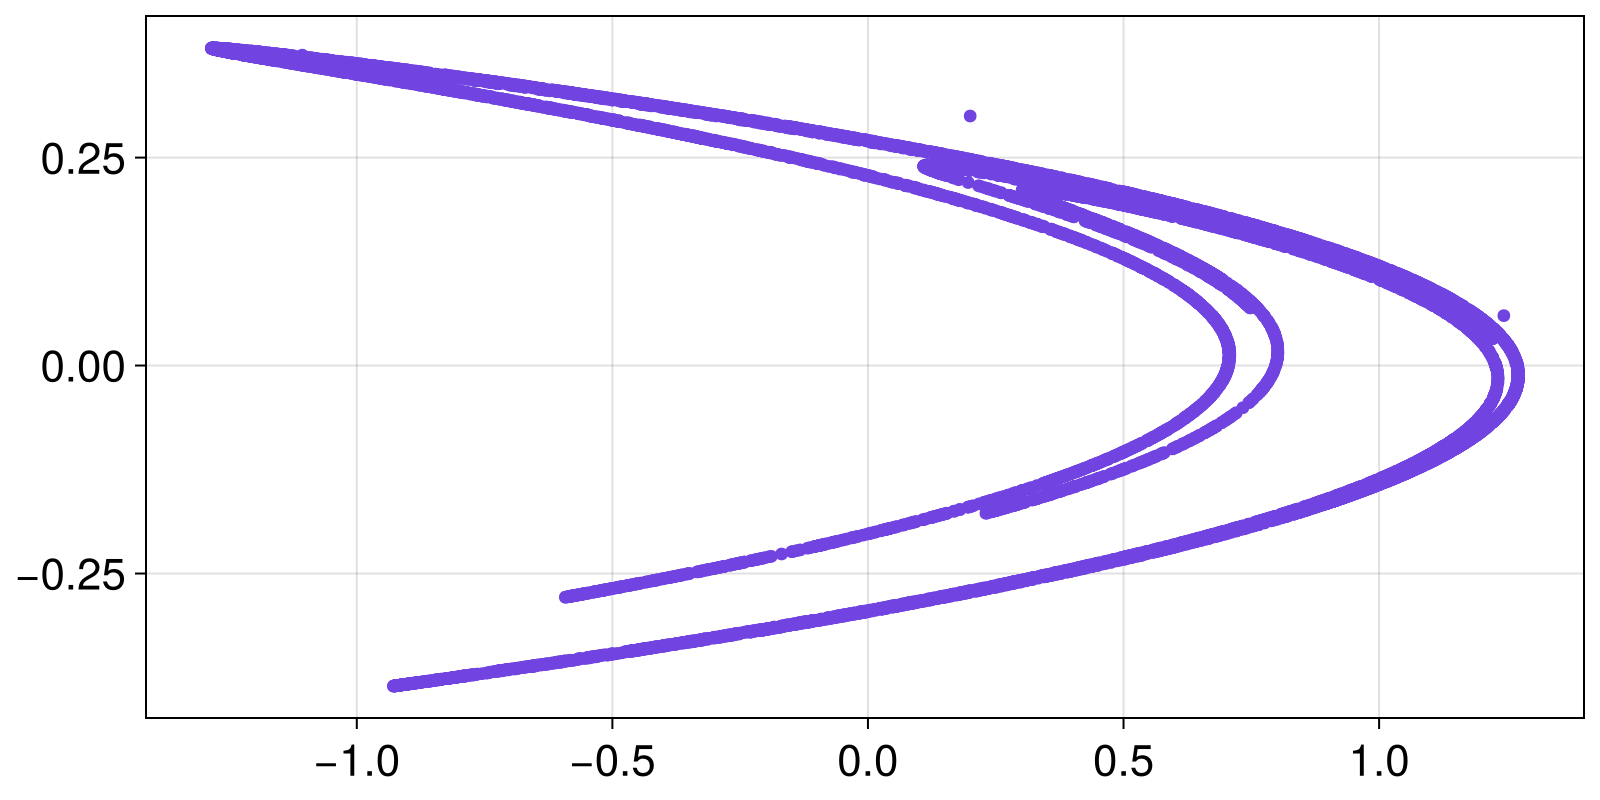

In [43]:
scatter(X)

even though Makie has no knowledge of the specifics of `StateSpaceSet`.

## Nonlinear data anlysis using state space sets

Several packages of the library deal with `StateSpaceSets`.

You could use `ComplexityMeasures` to obtain the entropy, or other complexity measures, of a given set. Below, we obtain the entropy of the natural density of the chaotic attractor by partitioning into a histogram of approximately `50` bins per dimension:

In [44]:
prob_est = ValueHistogram(50)
entropy(prob_est, X)

7.825799208736613

Or, obtain the permutation and sample entropies of the two columns of `X`:

In [45]:
pex = entropy_permutation(x; m = 4)
sey = entropy_sample(y; m = 2)
pex, sey

(3.15987571159201, 0.02579132263914716)

Alternatively, you could use `FractalDimensions` to get the fractal dimensions of the chaotic attractor of the henon map using the Grassberger-Procaccia algorithm:

In [46]:
grassberger_proccacia_dim(X; show_progress = false)

1.2232922815092426

Or, you could obtain a recurrence matrix of a state space set with `RecurrenceAnalysis`

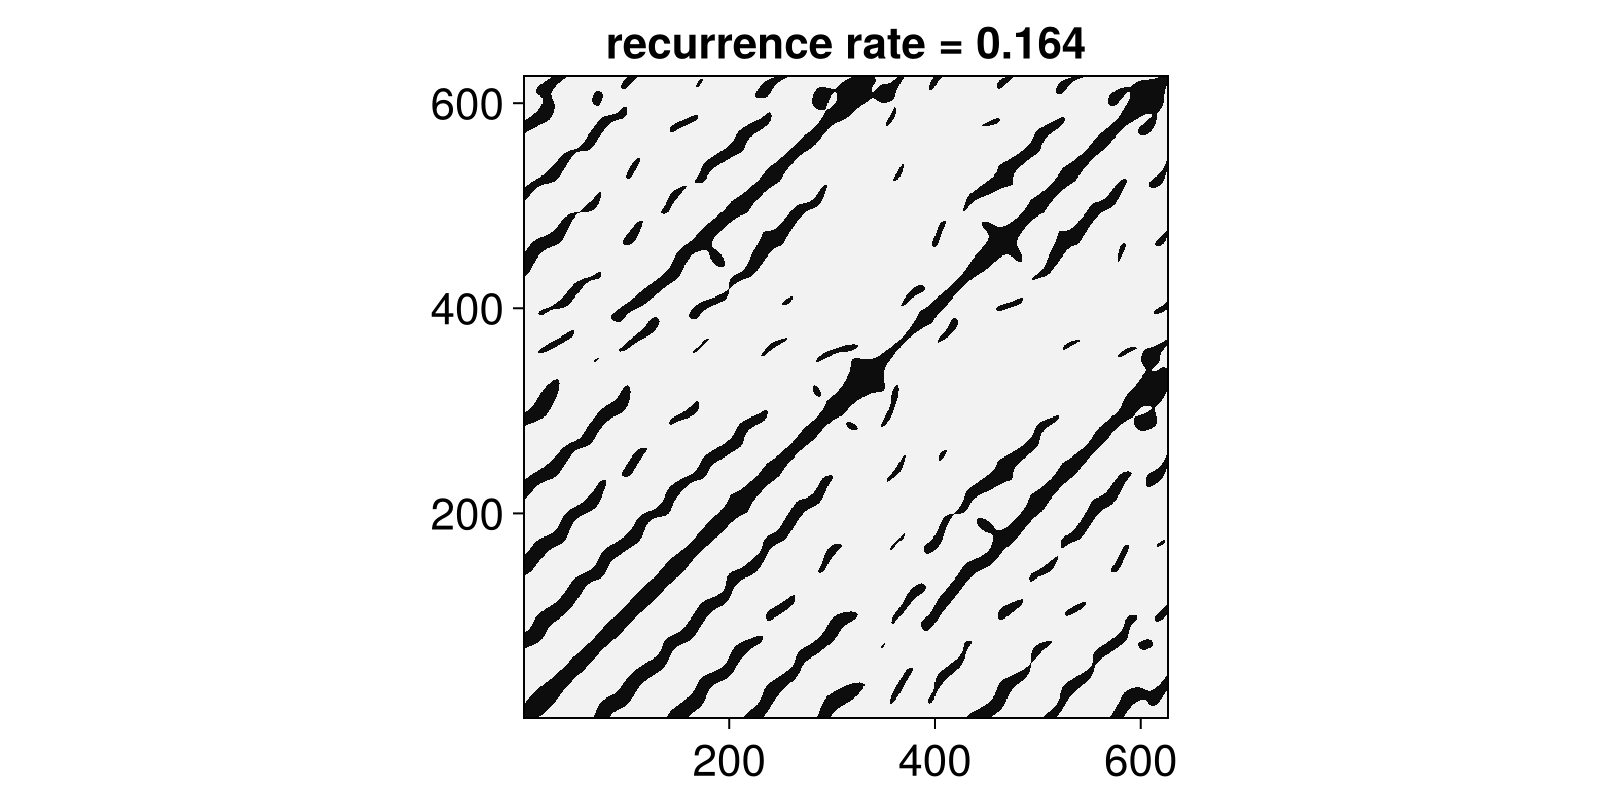

In [47]:
R = RecurrenceMatrix(Y, 8.0)
Rg = grayscale(R)
rr = recurrencerate(R)
heatmap(Rg; colormap = :grays,
    axis = (title = "recurrence rate = $(round(rr; digits = 3))", aspect = 1)
)

## More nonlinear timeseries analysis

A `trajectory` of a known dynamical system is one way to obtain a `StateSpaceSet`.
However, another common way is via a delay coordinates embedding of a measured/observed timeseries.
For example, we could use `optimal_separated_de` from `DelayEmbeddings` to
create an optimized delay coordinates embedding of a timeseries

In [48]:
w = Y[:, 1] # first variable of Lorenz96
𝒟, τ, e = optimal_separated_de(w)
𝒟

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


5-dimensional StateSpaceSet{Float64} with 558 points
  3.15369   -2.40036    1.60497   2.90499  5.72572
  2.71384   -2.24811    1.55832   3.04987  5.6022
  2.2509    -2.02902    1.50499   3.20633  5.38629
  1.77073   -1.75077    1.45921   3.37699  5.07029
  1.27986   -1.42354    1.43338   3.56316  4.65003
  0.785468  -1.05974    1.43672   3.76473  4.12617
  0.295399  -0.673567   1.47423   3.98019  3.50532
 -0.181891  -0.280351   1.54635   4.20677  2.80048
 -0.637447   0.104361   1.64932   4.44054  2.03084
 -1.06201    0.465767   1.77622   4.67654  1.22067
  ⋮                                        
  7.42111    9.27879   -1.23936   5.15945  3.25618
  7.94615    9.22663   -1.64222   5.24344  3.34749
  8.40503    9.13776   -1.81947   5.26339  3.46932
  8.78703    8.99491   -1.77254   5.22631  3.60343
  9.08701    8.77963   -1.51823   5.13887  3.72926
  9.30562    8.47357   -1.08603   5.00759  3.82705
  9.4488     8.06029   -0.514333  4.83928  3.88137
  9.52679    7.52731    0.153637  4.6

and compare

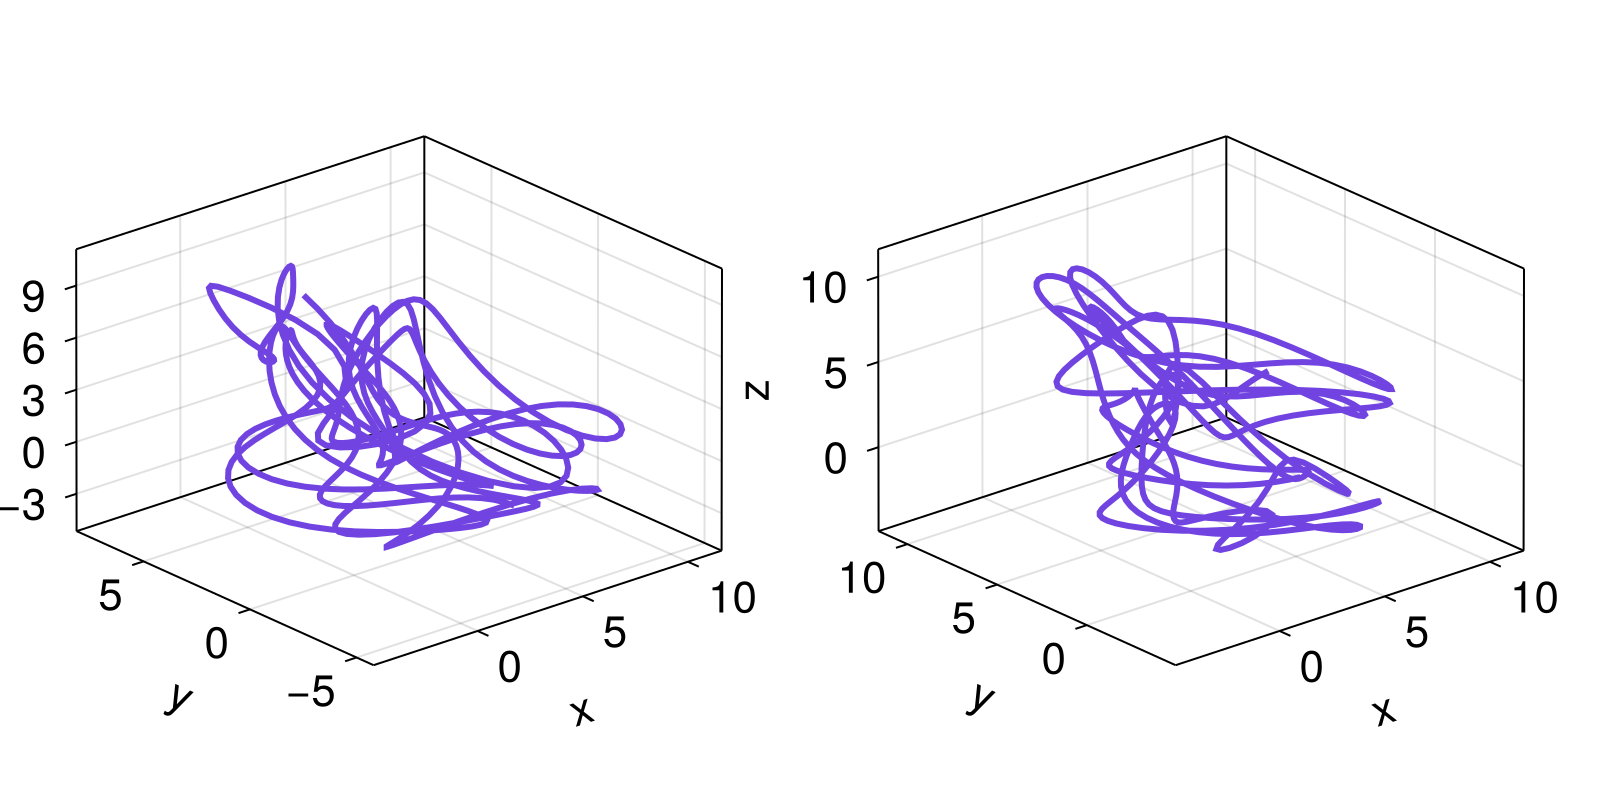

In [49]:
fig = Figure()
axs = [Axis3(fig[1, i]) for i in 1:2]
for (S, ax) in zip((Y, 𝒟), axs)
    lines!(ax, S[:, 1], S[:, 2], S[:, 3])
end
fig

Since `𝒟` is just another state space set, we could be using any of the above
analysis pipelines on it just as easily.

`TimeseriesSurrogates` ties well all other observed/measured data analysis by
providing a framework for hypothesis testing. For example, if we had a measured
timeseries but we were not sure whether it represents a deterministic system with structure
in the state space, or mostly noise, we could do a surrogate test.
Let's say that this is the timeseries we want to use:

In [50]:
x # Henon map timeseries
# contaminate with noise
using Random: Xoshiro
rng = Xoshiro(1234)
noisyx = x .+ randn(rng, length(x))/100

10001-element Vector{Float64}:
  0.20970656328855217
  1.234207815884648
 -1.0975317911640587
 -0.34136333412866937
  0.49919984887361246
  0.525908789214369
  0.7698512214687646
  0.40494794365255515
  1.0178148279094894
 -0.32065647099440525
  ⋮
 -0.5795026223156395
  0.8506112680355368
 -0.19401795429457597
  1.1986459649969237
 -1.0820164160511792
 -0.281009566309449
  0.565898869505943
  0.47369878723368636
  0.847005938798569

To do the test, we use `SurrogateTest` and `RandomFourier` from `TimeseriesSurrogates`.
We need to provide a function that given a timeseries it outputs a discriminatory value,
which is typically some nonlinear measure. Here we will use
the `generalized_dim` from `FractalDimensions` (because it performs better in noisy sets)
applied to the delay embedded set of the timeseries.

In [51]:
discriminatory(x) = generalized_dim(embed(x, 2, 1); show_progress = false)

discriminatory (generic function with 1 method)

we then initialize the test and obtain its p-value:

In [52]:
surrogate_method = RandomFourier()
test = SurrogateTest(discriminatory, noisyx, surrogate_method; n = 1000)
pval = pvalue(test)

0.0

Since the p-value is very small we have good confidence that the timeseries
come from some nonlinear system and they are not just noise.

The last component of **DynamicalSystems.jl** to mention is `SignalDecomposition`,
a general-purpose tool that can perform de-noising or de-trending in timeseries,
a step often useful when pre-processing data before further analysis.
It incorporates several linear and nonlinear techniques. For example,
one can attempt to de-noise the noisy Henon map timeseries we used above
with nonlinear techniques, for example:

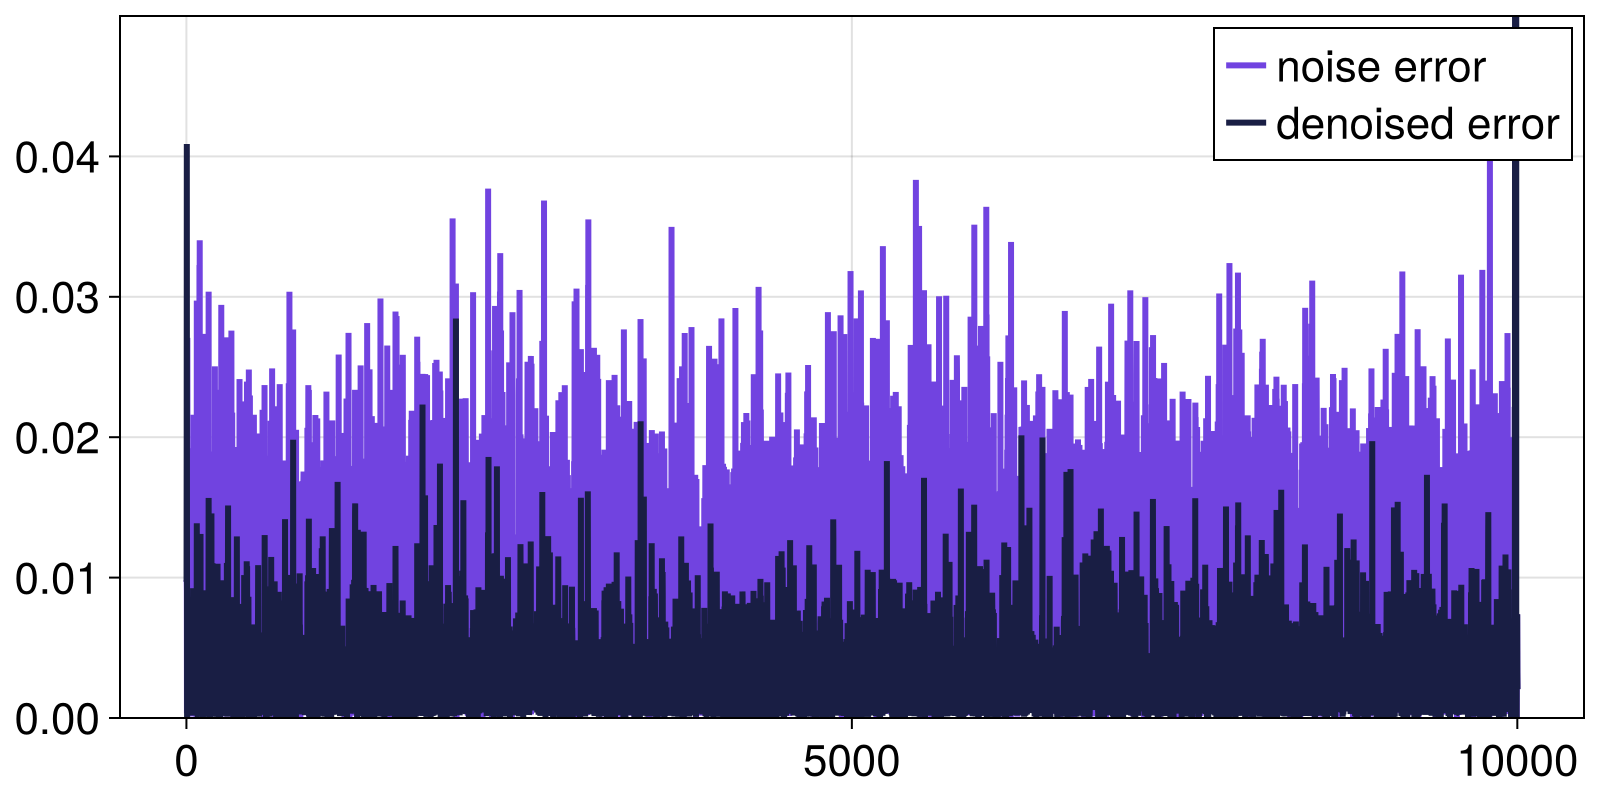

In [53]:
m = 5
k = 15
Q = [3, 3, 3, 3, 3]
denoisedx, _ = SignalDecomposition.decompose(noisyx, ManifoldProjection(m, Q, k))
fig, ax = lines(abs.(x .- noisyx); label = "noise error")
lines!(ax, abs.(x .- denoisedx); label = "denoised error")
ylims!(ax, 0, 0.05)
axislegend(ax)
fig

## Integration with ModelingToolkit.jl

**DynamicalSystems.jl** understands when a model has been generated via [ModelingToolkit.jl](https://docs.sciml.ai/ModelingToolkit/stable/). The symbolic variables used in ModelingToolkit.jl can be used to access the state or parameters of the dynamical system.

To access this functionality, the `DynamicalSystem` must be created from a `DEProblem` of the SciML ecosystem, and the `DEProblem` itself must be created from a ModelingToolkit.jl model.

> **ProcessBasedModelling.jl**
>
> ProcessBasedModelling.jl is an extension to ModelingToolkit.jl for creating
> models from a set of equations. It has been designed to be useful for scenarios
> applicable to a typical nonlinear dynamics analysis workflow,
> and provides improved error messages during system construction versus MTK.
> Have a look [at its docs](https://juliadynamics.github.io/ProcessBasedModelling.jl/stable/)!

Let's create a the Roessler system as an MTK model:

In [54]:
using ModelingToolkit

@variables t # use unitless time
D = Differential(t)
@mtkmodel Roessler begin
    @parameters begin
        a = 0.2
        b = 0.2
        c = 5.7
    end
    @variables begin
        x(t) = 1.0
        y(t) = 0.0
        z(t) = 0.0
        nlt(t) # nonlinear term
    end
    @equations begin
        D(x) ~ -y -z
        D(y) ~ x + a*y
        D(z) ~ b + nlt
        nlt ~ z*(x - c)
    end
end

@mtkcompile model = Roessler()

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/H1QXB/src/utils.jl:121


Model model:
Equations (3):
  3 standard: see equations(model)
Unknowns (3): see unknowns(model)
  z(t) [defaults to 0.0]
  y(t) [defaults to 0.0]
  x(t) [defaults to 1.0]
Parameters (3): see parameters(model)
  a [defaults to 0.2]
  b [defaults to 0.2]
  c [defaults to 5.7]
Observed (1): see observed(model)

this model can then be made into an `ODEProblem`.

In [55]:
prob = ODEProblem(model, nothing, (0.0, Inf))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, Inf)
u0: 3-element Vector{Float64}:
 0.0
 0.0
 1.0

We used `nothing` for the initialization container as all parameters and
state variables have been created with default values.

Now, this problem can be made into a `CoupledODEs`:

In [56]:
roessler = CoupledODEs(prob)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  GeneratedFunctionWrapper
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    ModelingToolkit.MTKParameters{Vector{Float64}, Vector{Float64}, Tuple{}, Tuple{}, Tuple{}, Tuple{}}([0.2, 0.2, 5.7], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], (), (), (), ())
 time:          0.0
 state:         [0.0, 0.0, 1.0]


This dynamical system instance can be used in the rest of the library like anything else.
Additionally, you can "observe" referenced symbolic variables:

In [57]:
observe_state(roessler, model.x)

1.0

or, more commonly, you can observe a `Symbol` that has the name of the symbolic variable:

In [58]:
observe_state(roessler, :nlt)

-0.0

These observables can also be used in the GUI visualization `interactive_trajectory_timeseries`.

You can also symbolically query or alter parameters

In [59]:
current_parameter(roessler, :c)

5.7

In [60]:
set_parameter!(roessler, :c, 5.0)

In [61]:
current_parameter(roessler, :c)

5.0

This symbolic indexing can be given anywhere in the ecosystem where you would be
altering the parameters, such as the function `global_continuation` from `Attractors`.

## Core components reference

```@docs
StateSpaceSet
DynamicalSystem
```

## Dynamical system implementations

```@docs
DeterministicIteratedMap
CoupledODEs
StroboscopicMap
PoincareMap
ProjectedDynamicalSystem
ArbitrarySteppable
CoupledSDEs
```

## `DynamicalSystem` interface reference

```@docs
current_state
initial_state
observe_state
state_name
current_parameters
current_parameter
parameter_name
initial_parameters
isdeterministic
isdiscretetime
dynamic_rule
current_time
initial_time
isinplace(::DynamicalSystem)
successful_step
referrenced_sciml_model
named_variables
```

## Learn more

To learn more, you need to visit the documentation pages of the modules that
compose **DynamicalSystems.jl**. See the contents page for more!